<a href="https://colab.research.google.com/github/VikasAdhikari07/Laptop_price_predictor/blob/main/EDA_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("LaptopPrice.csv")

In [ ]:
df.shape[0]

1303

In [ ]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
df["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [ ]:
df.duplicated().sum()
# This means no duplicate rows

0

In [ ]:
df.isnull().sum()
# NUmber of null value

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
# Removing GB from RAM column and kg form weight column
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [ ]:
# Changing Data type of RAM and weight from object to integer
df['Ram'] = df['Ram'].astype("int32")
df['Weight'] = df['Weight'].astype("float32")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


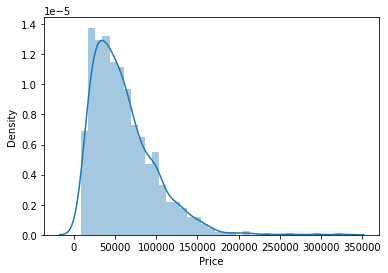

In [ ]:
sns.distplot(df["Price"])

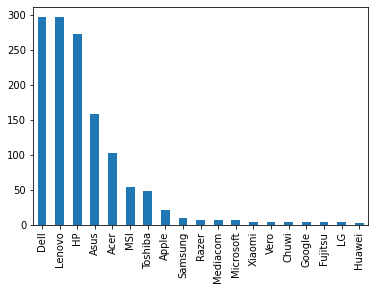

In [ ]:
df['Company'].value_counts().plot(kind='bar')

In [ ]:
df['Price'][df['Company']=="Apple"].mean()

83340.49988571428

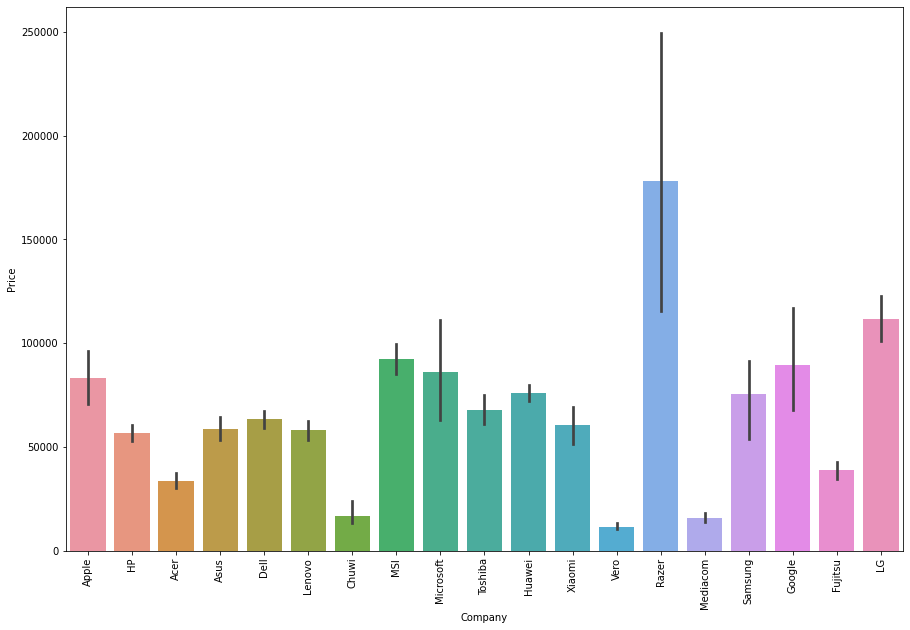

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

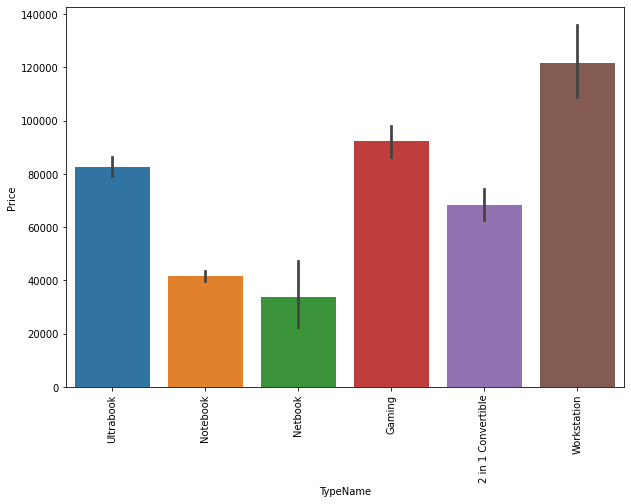

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

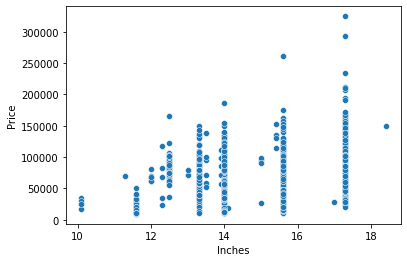

In [ ]:
# plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Inches'],y=df['Price'])
plt.show()

In [ ]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
if_touchscreen = []
for i in df['ScreenResolution']:
  if "Touchscreen" in i:
    if_touchscreen.append(1)
  else:
    if_touchscreen.append(0)

df['TouchScreen'] = if_touchscreen
# df['ScreenResolution']= df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)

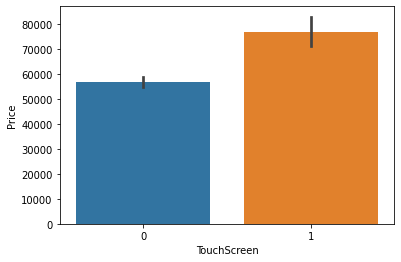

In [ ]:
sns.barplot(x = df['TouchScreen'],y= df['Price'])
# As we can see there is a price gap in this feature so we will take keep this feature

In [ ]:
df["IPS_panel"] = df['ScreenResolution'].apply(lambda x:1 if "IPS" in x else 0)

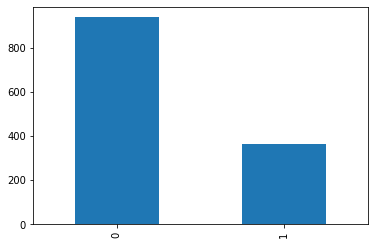

In [ ]:
df['IPS_panel'].value_counts().plot(kind="bar")

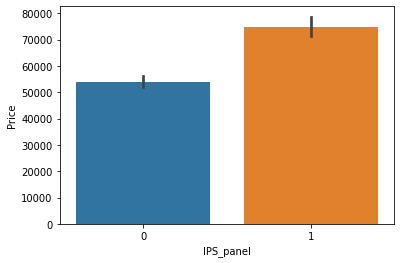

In [ ]:
sns.barplot(x=df['IPS_panel'],y = df['Price'])

In [ ]:
df['ScreenResolution']


0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [ ]:
# # Extracting resolution from ScreenResolution
# resolution_x = []
# resolution_y = []
# for i in df["ScreenResolution"]:
#   j,k = i.split("x")
#   resolution_x.append(j[-4:])
#   resolution_y.append(k)

In [ ]:
# df["x_resolution"] = resolution_x
# df["y_resolution"] = resolution_y

In [ ]:
# df["x_resolution"] = df["x_resolution"].astype('int')
# df["y_resolution"] = df["y_resolution"].astype('int')

In [ ]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS_panel      0.252208
Name: Price, dtype: float64

In [ ]:
# Extracting resolution from ScreenResolution
resolution = []
for i in df["ScreenResolution"]:
  j,k = i.split("x")
  resolution.append(j[-4:]+"x"+k)
df["Resolution"] = resolution

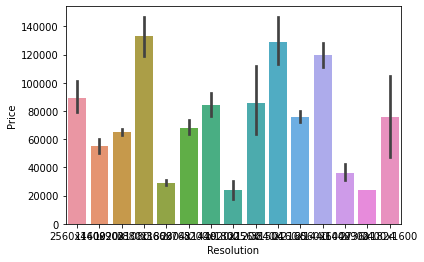

In [ ]:
sns.barplot(x="Resolution",y="Price",data = df)

In [ ]:
df["x_res"]= df["Resolution"].apply(lambda x: x.split('x')[0]).astype('int')
df["y_res"]= df["Resolution"].apply(lambda x: x.split('x')[1]).astype('int')

In [ ]:
# Converting x_resulution ,y_resolution and inches column into  Pixles Per Inches
# to Get  better results

df['PPI'] = ((df["x_res"]**2 + df["y_res"]**2)**0.5)/df["Inches"]

In [ ]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS_panel      0.252208
x_res          0.556529
y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [ ]:
df.drop(columns=["ScreenResolution"],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS_panel,Resolution,x_res,y_res,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560x1600,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440x900,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920x1080,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880x1800,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560x1600,2560,1600,226.983005


In [ ]:
df.drop(columns=["x_res","y_res","Resolution","Inches"],inplace=True)

In [ ]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [ ]:
df["Cpu_name"] =  df["Cpu"].apply(lambda x: " ".join(x.split()[0:3]))

In [ ]:
def cpu(text):
  if text=="Intel Core i7" or text== "Intel Core i5" or text=="Intel Core i3":
    return text
  else:
    if text.split()[0] == "Intel":
      return "Other Intel Processor"
    else:
      return "AMD Processor"

In [ ]:
df["CPU"] =  df["Cpu_name"].apply(cpu)

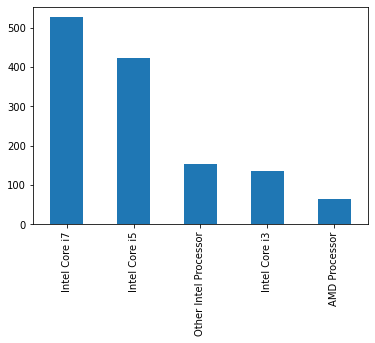

In [ ]:
df["CPU"].value_counts().plot(kind="bar")

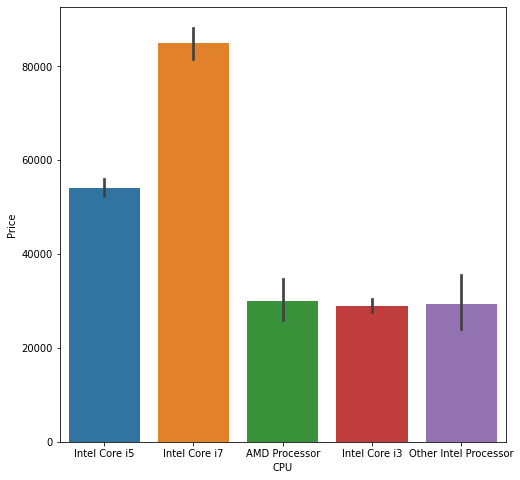

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(y="Price",x="CPU",data=df)
plt.show()

In [ ]:
df.drop(columns=["Cpu","Cpu_name"],inplace=True)

In [ ]:
import re

In [ ]:
# Making a Separate column for SSD
ssd = []
for i in df["Memory"]:
  temp = i.split(" +  ")
  total_ssd=0
  if(len(temp)>1):
    if("SSD" in  temp[0]):
      if("TB" in temp[0]):
        total_ssd = 1024 * int(re.findall(r'\d+', temp[0])[0]) +total_ssd
      else:
        total_ssd = total_ssd+int(re.findall(r'\d+', temp[0])[0])
    if("SSD" in  temp[1]):
      if("TB" in temp[1]):
        total_ssd = 1024+total_ssd
      else:
        total_ssd = total_ssd+int(re.findall(r'\d+', temp[1])[0])
  else:
    if("SSD" in  temp[0]):
      if("TB" in temp[0]):
        total_ssd = 1024+total_ssd
      else:
        total_ssd = total_ssd+int(re.findall(r'\d+', temp[0])[0])
  ssd.append(total_ssd)

In [ ]:
df["SSD"] = ssd

In [ ]:
# Making Separate Column for HDD
hdd = []
for i in df["Memory"]:
  temp = i.split(" +  ")
  total_hdd=0
  if(len(temp)>1):
    if("HDD" in  temp[0]):
      if("TB" in temp[0]):
        total_hdd = 1024 * int(re.findall(r'\d+', temp[0])[0]) +total_hdd
      else:
        total_hdd = total_hdd+int(re.findall(r'\d+', temp[0])[0])
    if("HDD" in  temp[1]):
      if("TB" in temp[1]):
        total_hdd = 1024 * int(re.findall(r'\d+', temp[1])[0]) +total_hdd
      else:
        total_hdd = total_hdd+int(re.findall(r'\d+', temp[1])[0])
  else:
    if("HDD" in  temp[0]):
      if("TB" in temp[0]):
        total_hdd = 1024 * int(re.findall(r'\d+', temp[0])[0]) +total_hdd
      else:
        total_hdd = total_hdd+int(re.findall(r'\d+', temp[0])[0])
  hdd.append(total_hdd)



df["HDD"] = hdd

In [ ]:
# Flash Storage column

flash= []
for i in df["Memory"]:
  temp = i.split(" +  ")
  total_flash=0
  if(len(temp)>1):
    if("Flash Storage" in  temp[0]):
      if("TB" in temp[0]):
        total_flash = 1024 * int(re.findall(r'\d+', temp[0])[0]) +total_flash
      else:
        total_flash = total_flash+int(re.findall(r'\d+', temp[0])[0])
    if("Flash Storage" in  temp[1]):
      if("TB" in temp[1]):
        total_flash = 1024 * int(re.findall(r'\d+', temp[1])[0]) +total_flash
      else:
        total_flash = total_flash+int(re.findall(r'\d+', temp[1])[0])
  else:
    if("Flash Storage" in  temp[0]):
      if("TB" in temp[0]):
        total_flash = 1024 * int(re.findall(r'\d+', temp[0])[0]) +total_flash
      else:
        total_flash = total_flash+int(re.findall(r'\d+', temp[0])[0])
  flash.append(total_flash)



df["Flash Storage"] = flash

In [ ]:
hybrid = []

for i in df["Memory"]:
  temp = i.split(" +  ")
  total_flash=0
  if(len(temp)>1):
    if("Hybrid" in  temp[0]):
      if("TB" in temp[0]):
        total_flash = 1024 * int(re.findall(r'\d+', temp[0])[0]) +total_flash
      else:
        total_flash = total_flash+int(re.findall(r'\d+', temp[0])[0])
    if("Hybrid" in  temp[1]):
      if("TB" in temp[1]):
        total_flash = 1024 * int(re.findall(r'\d+', temp[1])[0]) +total_flash
      else:
        total_flash = total_flash+int(re.findall(r'\d+', temp[1])[0])
  else:
    if("Hybrid" in  temp[0]):
      if("TB" in temp[0]):
        total_flash = 1024 * int(re.findall(r'\d+', temp[0])[0]) +total_flash
      else:
        total_flash = total_flash+int(re.findall(r'\d+', temp[0])[0])
  hybrid.append(total_flash)


df["Hybrid Storage"]= hybrid

In [ ]:
df.corr()["Price"]
# There is no corelation with flash and hybrid so we are removing them

Ram               0.743007
Weight            0.210370
Price             1.000000
TouchScreen       0.191226
IPS_panel         0.252208
PPI               0.473487
SSD               0.670682
HDD              -0.094856
Flash Storage    -0.040511
Hybrid Storage    0.008011
Name: Price, dtype: float64

In [ ]:
df.drop(columns=["Flash Storage","Hybrid Storage"],inplace=True)

In [ ]:
df.drop(columns=["Memory"],inplace=True)

In [ ]:
df["GPU Name"] = df["Gpu"].apply(lambda x: x.split(" ")[0])

In [ ]:
df["GPU Name"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GPU Name, dtype: int64

In [ ]:
# we should remove ARM as it will be outlier so we need to remove it
df.drop(df[df["GPU Name"]=="ARM"].index,inplace=True)

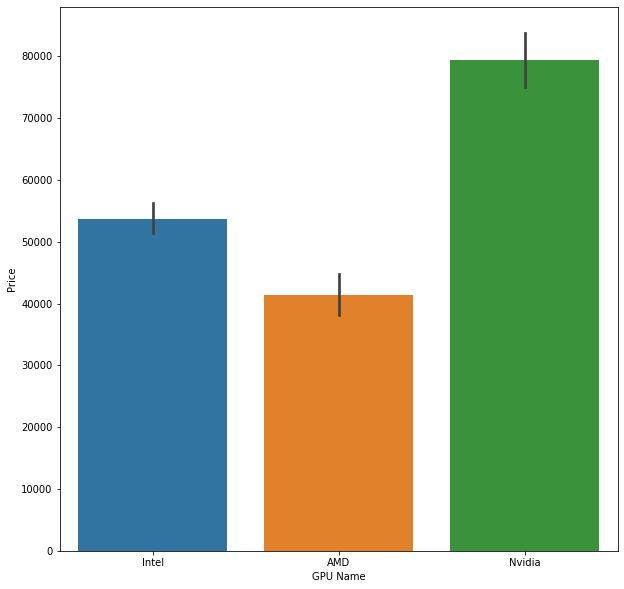

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(y = "Price",x = "GPU Name",data =df )
plt.show()

In [ ]:
os= []
for i in df["OpSys"]:
  if("mac" in i.lower()):
    os.append("Mac")

  elif("windows" in i.lower()):
    os.append("Windows")

  elif("linux" in i.lower()):
    os.append("Linux")
  else:
    os.append("Other OS / No OS")

In [ ]:
df["Operating System"] = os

In [ ]:
df.drop(columns=["OpSys"],inplace = True)

In [ ]:
df.drop(columns=["Gpu"],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


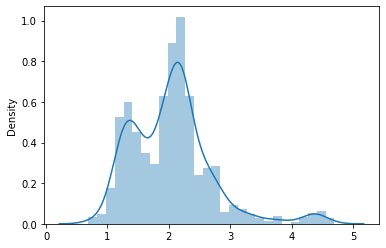

In [ ]:
sns.distplot(x=df["Weight"])

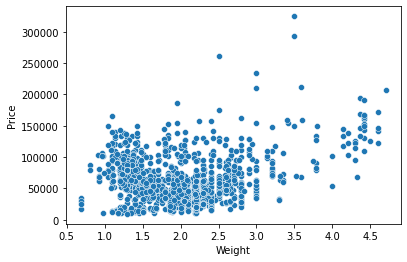

In [ ]:
sns.scatterplot(x="Weight",y="Price",data=df)

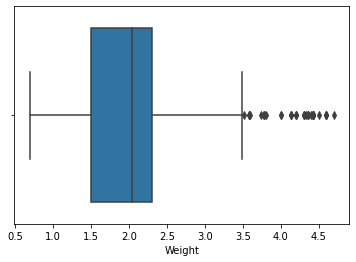

In [ ]:
# First approach by using a boxplot

sns.boxplot(x=df["Weight"])

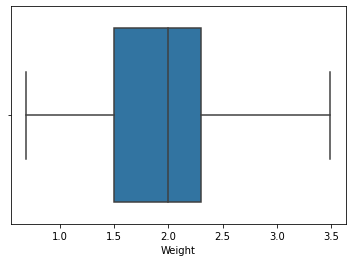

In [ ]:
sns.boxplot(x=df[df["Weight"]<3.5]["Weight"])

In [ ]:
df[df["Weight"]<3.5]

# Outliers removed from column weight

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS_panel,PPI,CPU,SSD,HDD,GPU Name,Operating System
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,Other OS / No OS
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,128,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,512,0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,0,1024,AMD,Windows


In [ ]:
# Second approach is by using IQR

_1st_qartile = np.percentile(df["Weight"],25)

_3rd_qartile = np.percentile(df["Weight"],75)

IQR = _3rd_qartile - _1st_qartile

upper_limit = IQR*1.5 +_3rd_qartile

lower_limit = _1st_qartile - 1.5*IQR

In [ ]:
df[df["Weight"]<upper_limit][df["Weight"]>lower_limit]["Weight"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1256, dtype: float32

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


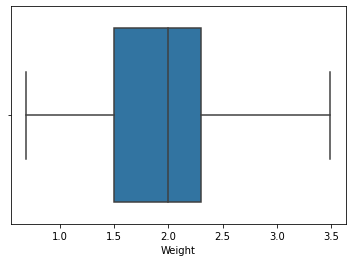

In [ ]:
# After removing outliers
sns.boxplot(x = df[df["Weight"]<upper_limit][df["Weight"]>lower_limit]["Weight"])

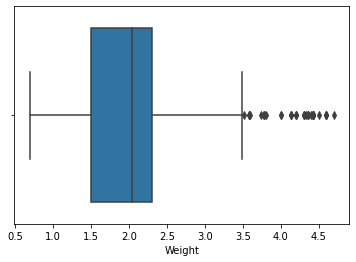

In [ ]:
# before removing outliers
sns.boxplot(x=df["Weight"])

In [ ]:
df["Weight"].shape

(1302,)

In [ ]:
df[df["Weight"]<upper_limit][df["Weight"]>lower_limit]["Weight"].index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302],
           dtype='int64', length=1256)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


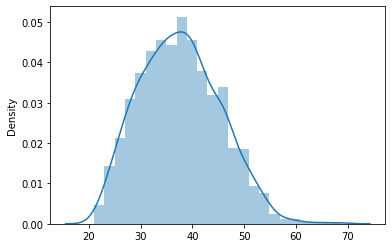

In [ ]:
sns.distplot(x=df["Price"].apply(lambda x:((x**(1/3)))))

In [ ]:
df["Price"] = df["Price"].apply(lambda x:((x**(1/3))))

## Final Dataset

In [ ]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS_panel,PPI,CPU,SSD,HDD,GPU Name,Operating System
0,Apple,Ultrabook,8,1.37,41.481665,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,36.316025,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,31.290369,0,0,141.211998,Intel Core i5,256,0,Intel,Other OS / No OS
3,Apple,Ultrabook,16,1.83,51.324009,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,45.803797,0,1,226.983005,Intel Core i5,256,0,Intel,Mac


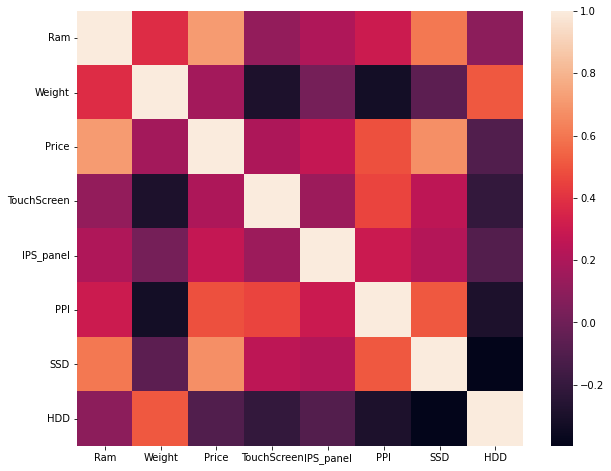

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

In [ ]:
X = df.drop(columns=["Price"])
y = df["Price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=5)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error 

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline(
    [
        ('step1',step1),
        ('step2',step2)
    ]
)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print("R2_score",r2_score(y_test,y_pred))
print("Mean absolute error",mean_absolute_error(y_test,y_pred))

R2_score 0.8094086295183334
Mean absolute error 2.5948788259571867


In [ ]:
X_train.head(1)

,Company,TypeName,Ram,Weight,TouchScreen,IPS_panel,PPI,CPU,SSD,HDD,GPU Name,Operating System
1251,HP,Notebook,4,1.86,0,0,100.45467,AMD Processor,0,500,AMD,Windows


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11]),
    ('scaling',StandardScaler(),[2,3,4,8,9])
],remainder='passthrough')

step2 = Ridge()

pipe = Pipeline(
    [
        ('step1',step1),
        ('step2',step2)
    ]
)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print("R2_score",r2_score(y_test,y_pred))
print("Mean absolute error",mean_absolute_error(y_test,y_pred))

R2_score 0.810444171480367
Mean absolute error 2.60471917393607


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso()

pipe = Pipeline(
    [
        ('step1',step1),
        ('step2',step2)
    ]
)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print("R2_score",r2_score(y_test,y_pred))
print("Mean absolute error",mean_absolute_error(y_test,y_pred))

R2_score 0.630213805919994
Mean absolute error 3.898379906302679


In [ ]:
x_hyper = step1.fit_transform(X_train)


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor()

pipe = Pipeline(
    [
        ('step1',step1),
        ('step2',step2)
    ]
)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print("R2_score",r2_score(y_test,y_pred))
print("Mean absolute error",mean_absolute_error(y_test,y_pred))

R2_score 0.7376458159733823
Mean absolute error 2.840185517591146


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor()

pipe = Pipeline(
    [
        ('step1',step1),
        ('step2',step2)
    ]
)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print("R2_score",r2_score(y_test,y_pred))
print("Mean absolute error",mean_absolute_error(y_test,y_pred))

R2_score 0.8459679113037759
Mean absolute error 2.28065582590332


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(x_hyper, y_train)


In [ ]:
# rf_random.best_estimator_

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(bootstrap=False, max_depth=70, max_features='sqrt',
                      min_samples_split=5, n_estimators=1600)


pipe = Pipeline(
    [
        ('step1',step1),
        ('step2',step2)
    ]
)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print("R2_score",r2_score(y_test,y_pred))
print("Mean absolute error",mean_absolute_error(y_test,y_pred))

R2_score 0.898532458303361
Mean absolute error 1.8875747014630413


In [ ]:
df.head(5)["Price"]**3

0     71378.6832
1     47895.5232
2     30636.0000
3    135195.3360
4     96095.8080
Name: Price, dtype: float64

In [ ]:
pipe.predict(df.head(5))**3

array([ 80428.95713726,  53867.46925397,  32199.95736347, 137024.12063564,
        90883.48220428])

In [ ]:
pipe.predict(df.head(1))

array([43.16556991])

In [ ]:
import sklearn
print("Scikit-Learn", sklearn.__version__)


Scikit-Learn 1.0.2


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR()

pipe = Pipeline(
    [
        ('step1',step1),
        ('step2',step2)
    ]
)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print("R2_score",r2_score(y_test,y_pred))
print("Mean absolute error",mean_absolute_error(y_test,y_pred))

R2_score 0.5396791463774107
Mean absolute error 4.290534552250457


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(colsample_bytree=0, gamma=4, max_depth=4, min_child_weight=3,
             reg_alpha=40, reg_lambda=0)



pipe = Pipeline(
    [
        ('step1',step1),
        ('step2',step2)
    ]
)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print("R2_score",r2_score(y_test,y_pred))
print("Mean absolute error",mean_absolute_error(y_test,y_pred))

[18:28:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2_score 0.6471776759093646
Mean absolute error 3.817280621275348


In [ ]:
grid = {'max_depth':  range(3, 18, 1),
        'gamma': range(1,9),
        'reg_alpha' : range(40,180,1),
        'reg_lambda' : range(0,1),
        'colsample_bytree' : range(0,1),
        'min_child_weight' : range(0, 10, 1),
    }

In [ ]:
xgb_random = RandomizedSearchCV(estimator = XGBRegressor(), param_distributions = grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
xgb_random.fit(x_hyper, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[18:28:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, estimator=XGBRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': range(0, 1),
                                        'gamma': range(1, 9),
                                        'max_depth': range(3, 18),
                                        'min_child_weight': range(0, 10),
                                        'reg_alpha': range(40, 180),
                                        'reg_lambda': range(0, 1)},
                   random_state=42, verbose=2)

In [ ]:
xgb_random.best_estimator_

XGBRegressor(colsample_bytree=0, gamma=4, max_depth=4, min_child_weight=3,
             reg_alpha=40, reg_lambda=0)

In [ ]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS_panel,PPI,CPU,SSD,HDD,GPU Name,Operating System
0,Apple,Ultrabook,8,1.37,41.481665,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,36.316025,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,31.290369,0,0,141.211998,Intel Core i5,256,0,Intel,Other OS / No OS
3,Apple,Ultrabook,16,1.83,51.324009,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,45.803797,0,1,226.983005,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,32.393780,1,1,157.350512,Intel Core i7,128,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,43.064752,1,1,276.053530,Intel Core i7,512,0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,23.021480,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,34.399531,0,0,100.454670,Intel Core i7,0,1024,AMD,Windows


In [ ]:
# import pickle

# pickle.dump(df,open('df.pkl','wb'))
# pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS_panel,PPI,CPU,SSD,HDD,GPU Name,Operating System
0,Apple,Ultrabook,8,1.37,41.481665,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,36.316025,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,31.290369,0,0,141.211998,Intel Core i5,256,0,Intel,Other OS / No OS
3,Apple,Ultrabook,16,1.83,51.324009,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,45.803797,0,1,226.983005,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,32.393780,1,1,157.350512,Intel Core i7,128,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,43.064752,1,1,276.053530,Intel Core i7,512,0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,23.021480,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,34.399531,0,0,100.454670,Intel Core i7,0,1024,AMD,Windows
